IMPORTING NECESSARY LIBRARIES

In [2]:
import numpy as np
from numpy import ndarray
from PIL import Image
from ImageProcessingUsingNumpy import ImageProcessing
from scipy.ndimage import convolve

Converting Image to Numpy array

In [3]:
img = Image.open('dog.jpg')
original_img = np.array(img)
original_img

array([[[ 57,  53,  41],
        [ 60,  56,  44],
        [ 62,  58,  46],
        ...,
        [ 76,  70,  54],
        [ 76,  70,  54],
        [ 74,  68,  52]],

       [[ 58,  54,  42],
        [ 59,  55,  43],
        [ 61,  57,  45],
        ...,
        [ 75,  69,  53],
        [ 76,  70,  54],
        [ 74,  68,  52]],

       [[ 60,  56,  44],
        [ 58,  54,  42],
        [ 59,  55,  43],
        ...,
        [ 75,  69,  53],
        [ 75,  69,  53],
        [ 76,  70,  54]],

       ...,

       [[ 92,  85,  67],
        [ 93,  86,  68],
        [ 93,  86,  68],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[ 93,  86,  68],
        [ 94,  87,  69],
        [ 93,  86,  68],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[ 89,  82,  64],
        [ 89,  82,  64],
        [ 90,  83,  65],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]]

Introduction

In [4]:
print("Welcome to the Image Processing Program!")
print("Please choose an operation:")
print()
print("1. Crop Image")
print("2. Rotate Image")
print("3. Flip Image")
print("4. Apply Filter")
print()
operation = input("Enter the number of the operation you want to perform: ")
print()

Welcome to the Image Processing Program!
Please choose an operation:

1. Crop Image
2. Rotate Image
3. Flip Image
4. Apply Filter




Creating an Instance of the ImageProcessing class

In [5]:
original_img_copy = original_img.copy()
img = ImageProcessing(original_img_copy)

Crop Image

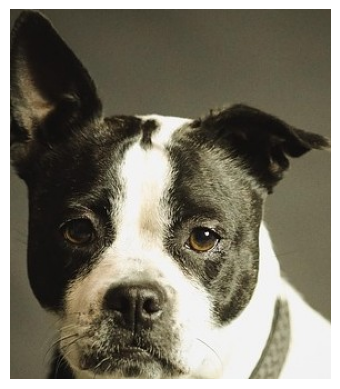

In [ ]:
if operation == 1:
    print("You chose to crop the image.")
    print()
    x1 = int(input("Enter initial x coordinate: "))
    y1 = int(input("Enter initial y coordinate: "))
    x2 = int(input("Enter final x coordinate: "))
    y2 = int(input("Enter final y coordinate: "))
    print()
    print("Cropping the image...")
    
    coord_1, coord_2 = (x1, y1), (x2, y2)
    img.crop_img(coord_2, coord_1)

Rotate Image

<Figure size 1000x500 with 0 Axes>

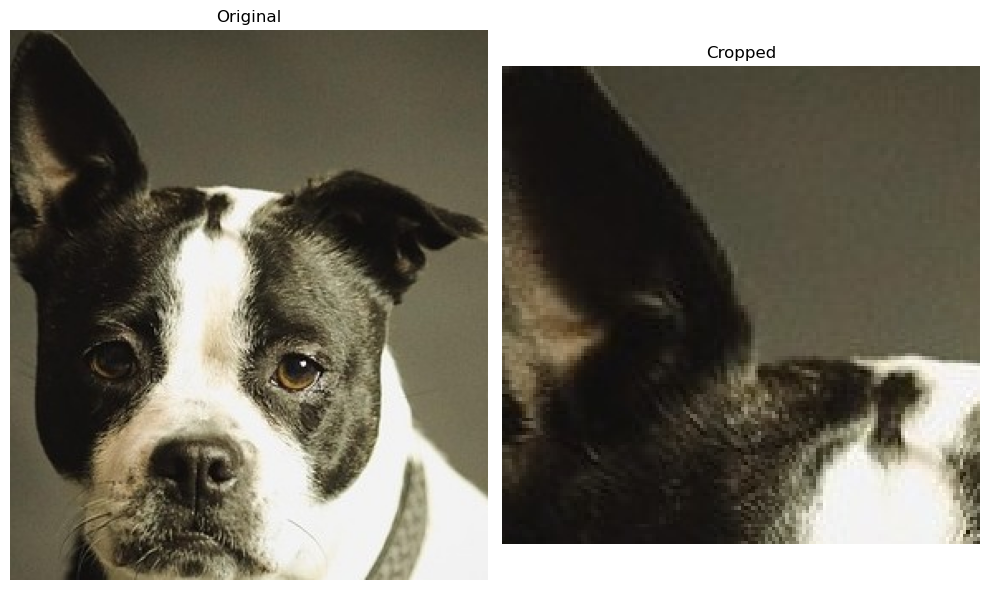

In [ ]:
if operation == 2:
    print("You chose to rotate the image.")
    print()
    print("Choose: ")
    print("1. Rotate clockwise")
    print("2. Rotate counter-clockwise")
    direction = int(input())
    print()
    print("Available angles: 90, 180, 270")

    if direction == 1:
        print("You chose to rotate clockwise.")
        print()

        while True:
            angle = int(input("Enter the angle of rotation: "))
            if angle in [90, 180, 270]:
                break
            else:
                print("Invalid angle. Please enter 90, 180, or 270.")
        
        num = angle // 90   #Converting angle to number of turns
    
    elif direction == 2:
        print("You chose to rotate counter-clockwise.")
        print()

        while True:
            angle = int(input("Enter the angle of rotation: "))
            if angle in [90, 180, 270]:
                break
            else:
                print("Invalid angle. Please enter 90, 180, or 270.")
        
        num = -angle // 90  #Converting angle to number of turns

    print()
    print("Rotating the image...")
    img.rotate_img(num)

Flip Image

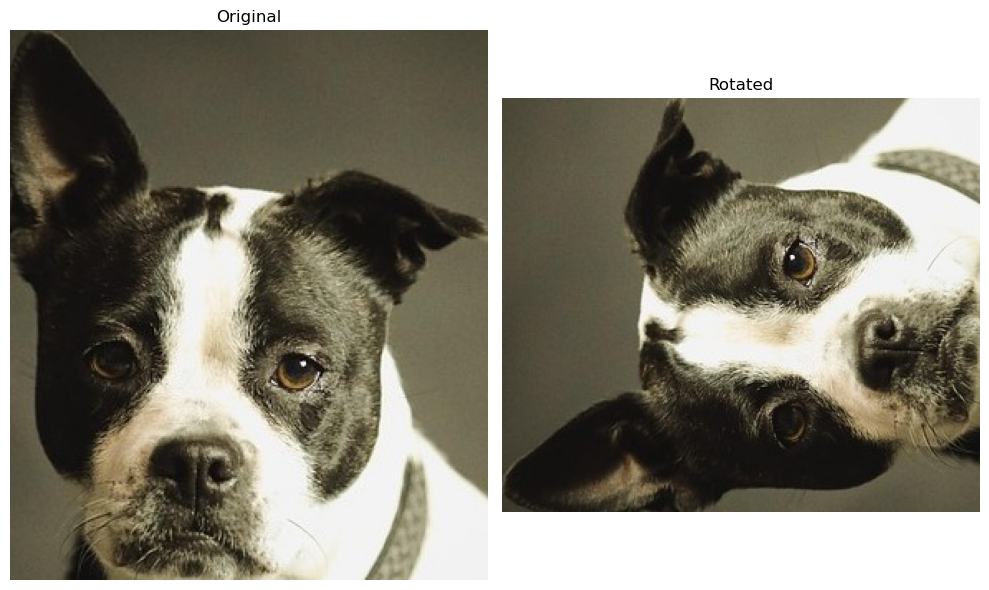

In [ ]:
if operation == 3:
    print("You chose to flip the image.")
    print()
    print("Choose flip direction:")
    print("1. Horizontal")
    print("2. Vertical")

    while True:
        direction = int(input())
        print()

        if direction == 1:
            print("Flipping image horizontally...")
            img.flip_img('h')
            break
        elif direction == 2:
            print("Flipping image vertically...")
            img.flip_img('v')
            break
        else:
            print("Invalid choice. Please enter 1 or 2.")

Apply Filters

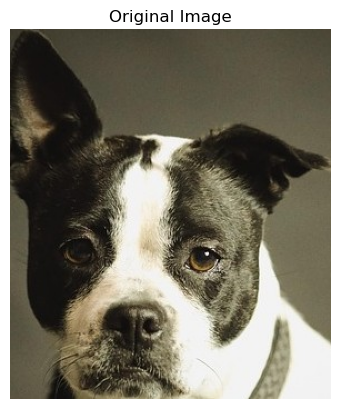

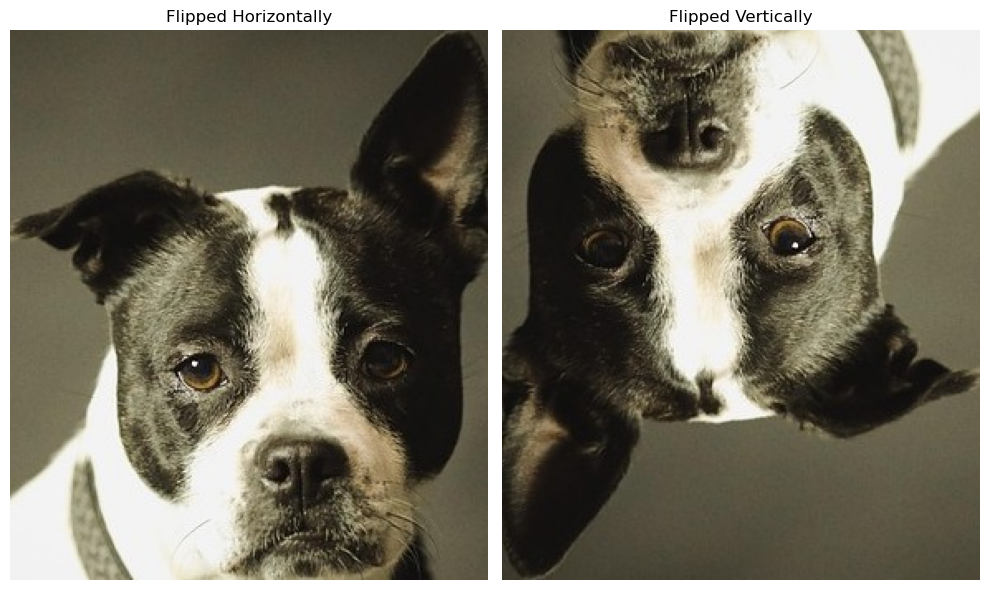

In [ ]:
if operation == 4:
    print("You chose to apply a filter to the image.")
    print()
    print("Available filters:")
    print("1. Negative")
    print("2. Grayscale")
    print("3. Binarise")
    print("4. Blur")
    print("5. Sharpen")
    print("6. Edge Detection")
    
    while True:
        filter_choice = int(input())
        print()

        if filter_choice == 1:
            print("Generating Negative...")
            img.negative()
            break
        elif filter_choice == 2:
            print("Grayscaling Image...")
            img.grayscale()
        elif filter_choice == 3:
            print("Binarising Image...")
            img.binarise()
        elif filter_choice == 4:
            print("Blurring Image...")
            img.blur_img()
            break
        elif filter_choice == 5:
            print("Sharpening Image...")
            img.sharpen_img()
            break
        elif filter_choice == 6:
            print("Applying Edge Detection...")
            img.edge_detection()
            break
        else:
            print("Invalid choice. Choose again.")
            

Convolution

In [11]:
def convolve2d(image_array: ndarray, kernel: ndarray):
    kernel = np.flipud(np.fliplr(kernel))

    if is_rgb(image_array):
        return "RGB image. Use convolve3d instead"
    else:
        rows, columns = image_array.shape
        krows, kcols = kernel.shape
        padrows, padcols = krows//2, kcols//2

        output = np.zeros_like(image_array)
        padded_img = np.pad(image_array, ((padrows, padrows), (padcols, padcols)), 'constant', constant_values=0)

        for row in range(rows):
            for col in range(columns):
                region = padded_img[row:row+krows, col:col+kcols]
                output[row, col] = np.clip(np.sum(region*kernel), 0, 255)

        return output

def convolve3d(image_array: ndarray, kernel: ndarray):
    dimensions = image_array.ndim

    if dimensions > 3:
        return "Convolution not possible"

    if dimensions == 2:
        return convolve2d(image_array, kernel)
    
    else:
        channels = image_array.shape[-1]
        output = np.zeros_like(image_array)

        for c in range(channels):
            channel = image_array[:,:,c]
            output[:,:,c] = convolve2d(channel, kernel)
        
        return output


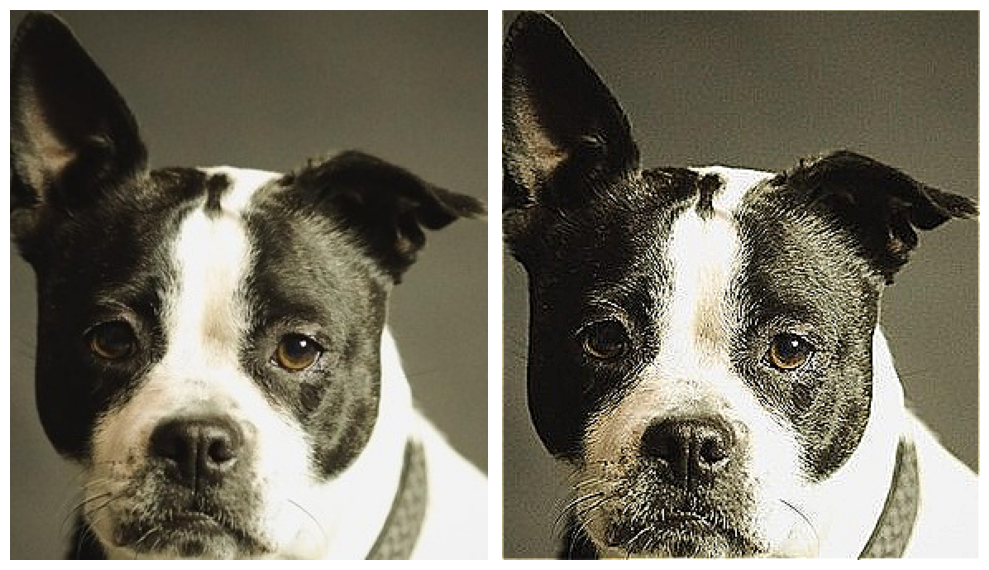

In [ ]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

sharpen_img = convolve3d(original_img, sharpen)

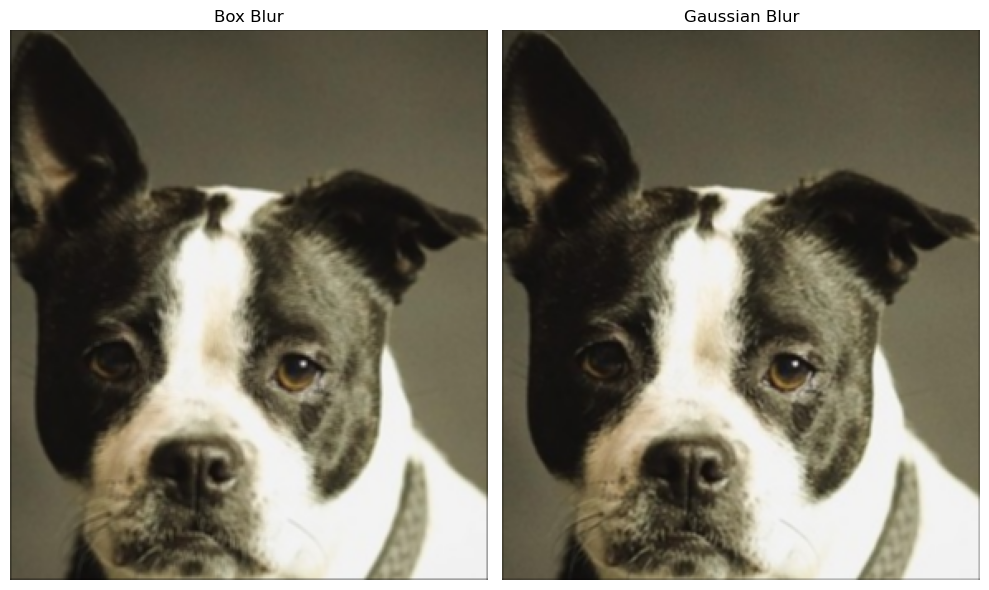

In [ ]:
box_blur = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

gaussian_blur = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

box_blur_img = convolve3d(original_img, box_blur)
gaussian_blur_img = convolve3d(original_img, gaussian_blur)

In [ ]:
# compare_img((original_img, "Original"), (box_blur_img, "Box Blur"), (gaussian_blur_img, "Gaussian Blur"))
compare_img((box_blur_img, "Box Blur"), (gaussian_blur_img, "Gaussian Blur"))

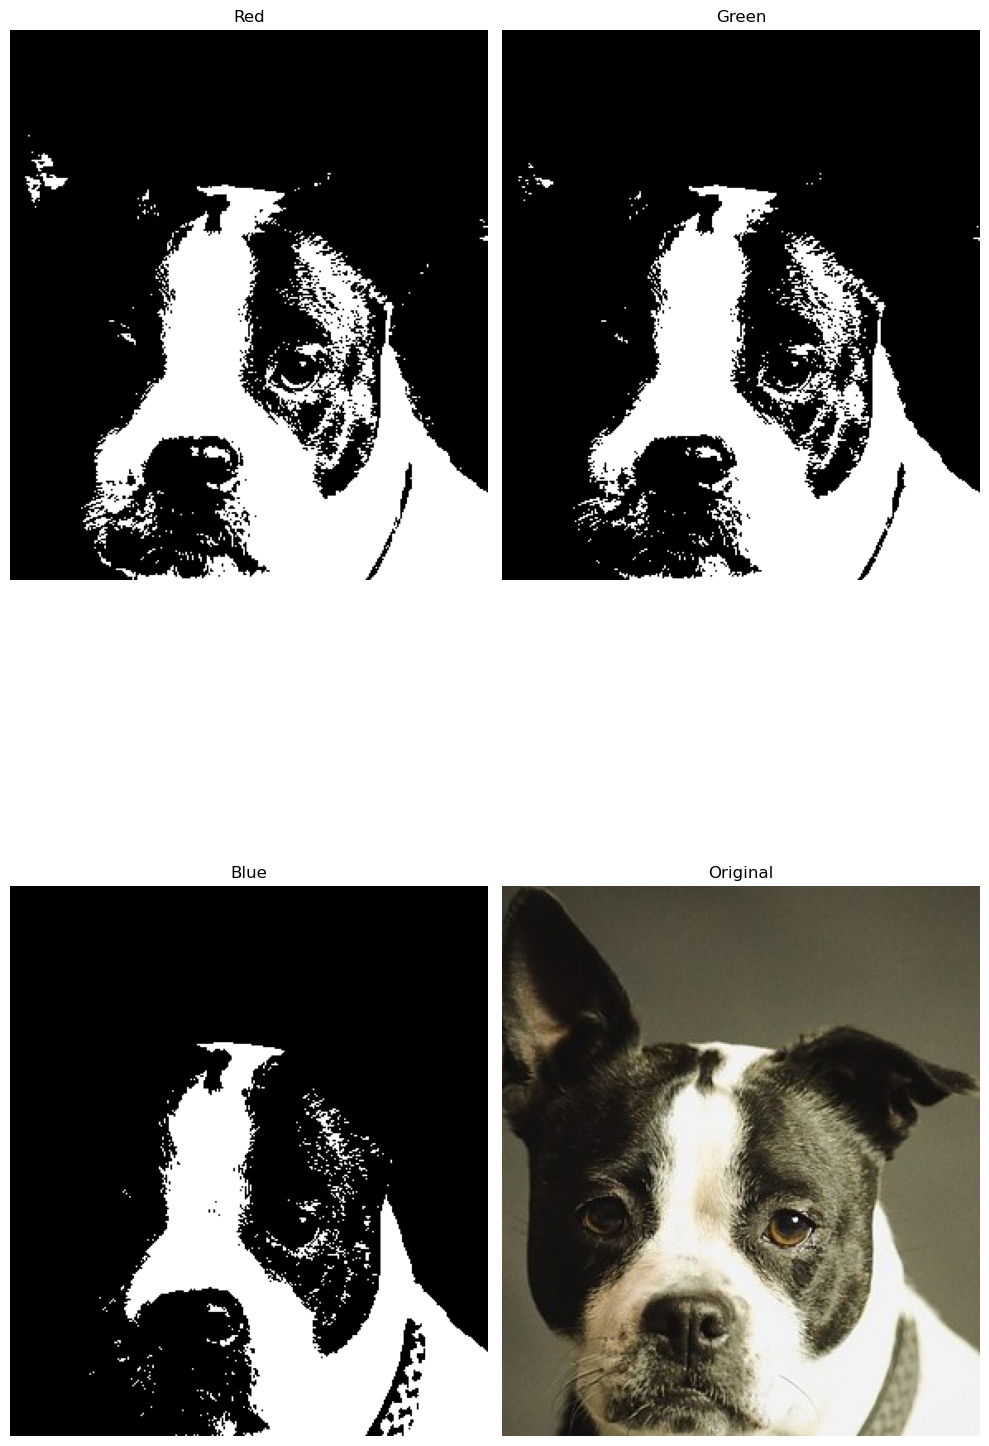

In [ ]:
red_binarised, green_binarised, blue_binarised = binarised_img[:,:,0], binarised_img[:, :, 1], binarised_img[:, :, 2]
compare_img((red_binarised, "Red"), (green_binarised, "Green"), (blue_binarised, "Blue"), (original_img, "Original"))

In [33]:
arr_1 = np.linspace(1, 20, 30).reshape(5,3,2)
print(arr_1)
print(arr_1.shape)
print()

arr_2 = np.linspace(1, 10, 30).reshape(5,3,2)
print(arr_2)
print(arr_2[:,:,0].shape)

print(arr_1[4][0])

[[[ 1.          1.65517241]
  [ 2.31034483  2.96551724]
  [ 3.62068966  4.27586207]]

 [[ 4.93103448  5.5862069 ]
  [ 6.24137931  6.89655172]
  [ 7.55172414  8.20689655]]

 [[ 8.86206897  9.51724138]
  [10.17241379 10.82758621]
  [11.48275862 12.13793103]]

 [[12.79310345 13.44827586]
  [14.10344828 14.75862069]
  [15.4137931  16.06896552]]

 [[16.72413793 17.37931034]
  [18.03448276 18.68965517]
  [19.34482759 20.        ]]]
(5, 3, 2)

[[[ 1.          1.31034483]
  [ 1.62068966  1.93103448]
  [ 2.24137931  2.55172414]]

 [[ 2.86206897  3.17241379]
  [ 3.48275862  3.79310345]
  [ 4.10344828  4.4137931 ]]

 [[ 4.72413793  5.03448276]
  [ 5.34482759  5.65517241]
  [ 5.96551724  6.27586207]]

 [[ 6.5862069   6.89655172]
  [ 7.20689655  7.51724138]
  [ 7.82758621  8.13793103]]

 [[ 8.44827586  8.75862069]
  [ 9.06896552  9.37931034]
  [ 9.68965517 10.        ]]]
(5, 3)
[16.72413793 17.37931034]


Image Creation

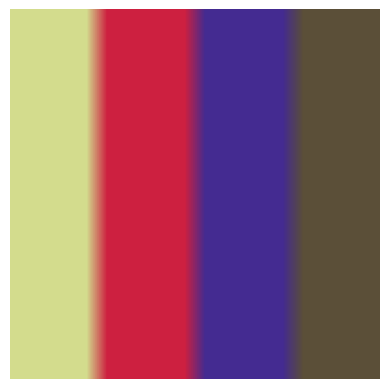

In [5]:
'''This creates a square image with parallel vertical color bars.
You can select the pixels for length, breadth - total pixels

You can select the no. of color bars you want - divisions
The color bars are merged in a small region between them so that the transition 
from one color to the other is gradual.
section = division + merging'''

total_px = 200 #Total pixels for the length, breadth - square image
divisions = 4   #Image is divided into some coloured regions; no of regions required
count = 3   #Magnitude of px required for merging - integer
channels = 3    #No of color channels. RGB is 3 channels
px_per_merging = count*divisions    #px_per_merging must be a multiple of (divisions-1) according to calculations
px_per_division = int((total_px + px_per_merging*(1-divisions))/divisions)  #According to calculations
px_per_section = px_per_division + px_per_merging   #A section is merging + division
image = np.zeros(shape=(total_px, total_px, channels))  #Zero image array of required shape

for i in range(channels):
    section = np.random.randint(0, 255, size=(divisions,)).astype(np.uint8) #The colours for the divisions
    
    for j in range(divisions):
        px = section[j]     #Colour for the division
        division_row = np.repeat(px, px_per_division)   #1 row of the division
        division_img = np.stack([division_row]*total_px)    #Image of the division is obtained by stacking the division_row column no. of times

        start = j*px_per_section    #Starting row of the entire image
        stop = start+px_per_division    #Ending row of the entire image
        image[:,start:stop,i] = division_img    #1 division of the entire image is made

        if j != divisions-1:    #merging is not done for the last division
            merge = np.linspace(px, section[j+1], px_per_merging)   #Creating 1 row for merging; pixels gradually change from one color to the other
            merge_img = np.stack([merge]*total_px)  #Image for merging

            start = stop    #Start row of merging
            stop = start+px_per_merging     #Stop row of merging
            image[:, start:stop, i] = merge_img     #Merging for previous division

image = image.astype(np.uint8)
image_copy = np.copy(image)
ImageProcessing.display_img(image)

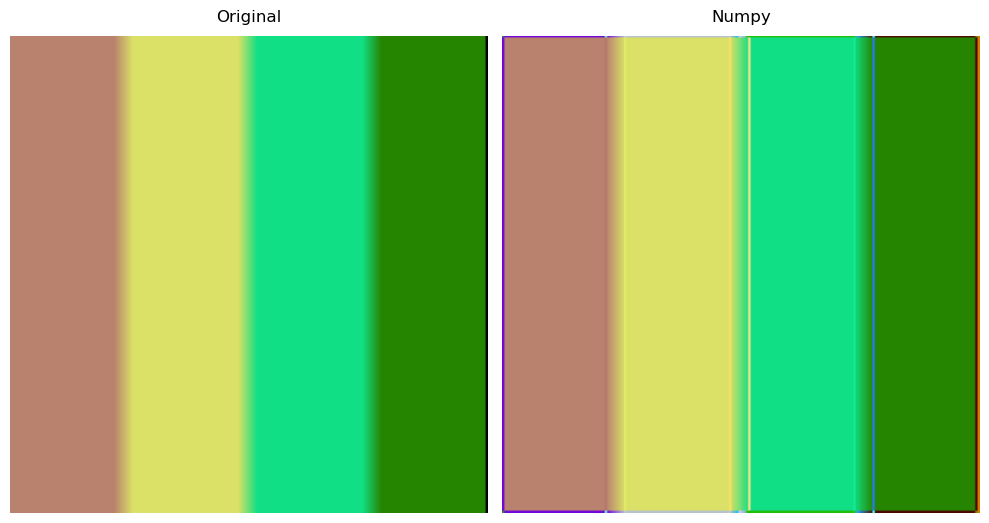

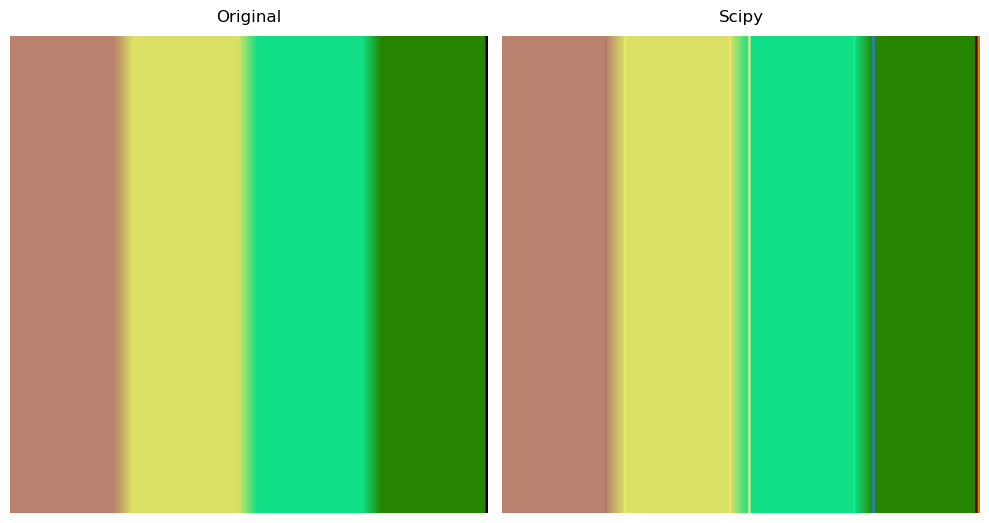

In [7]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

result_sc = np.zeros_like(image)

for i in range(3):
    result_sc[:,:,i] = np.clip(convolve(image[:,:,i], sharpen), 0, 255)

result_np = ImageProcessing.convolve3d(image, sharpen)

ImageProcessing.compare_img((image.astype(np.uint8), "Original"), (result_np.astype(np.uint8), "Numpy"))
ImageProcessing.compare_img((image.astype(np.uint8), "Original"), (result_sc.astype(np.uint8), "Scipy"))

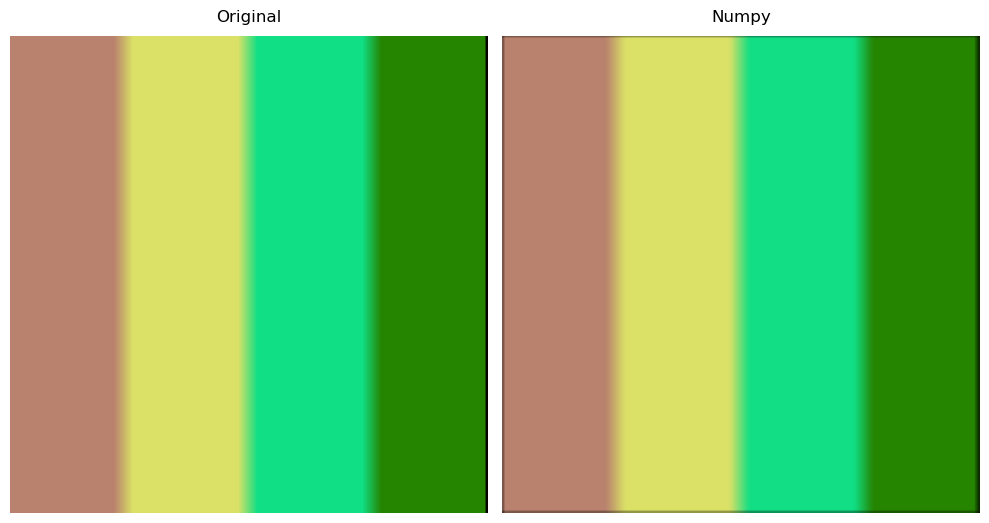

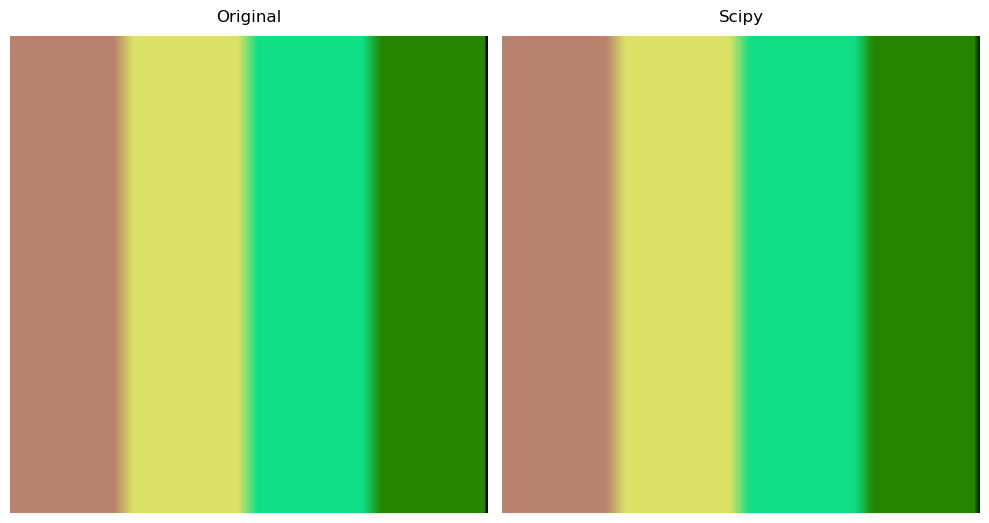

In [8]:
blur = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

result_sc = np.zeros_like(image)

for i in range(3):
    result_sc[:,:,i] = np.clip(convolve(image[:,:,i], blur), 0, 255)

result_np = ImageProcessing.convolve3d(image, blur)

ImageProcessing.compare_img((image.astype(np.uint8), "Original"), (result_np.astype(np.uint8), "Numpy"))
ImageProcessing.compare_img((image.astype(np.uint8), "Original"), (result_sc.astype(np.uint8), "Scipy"))

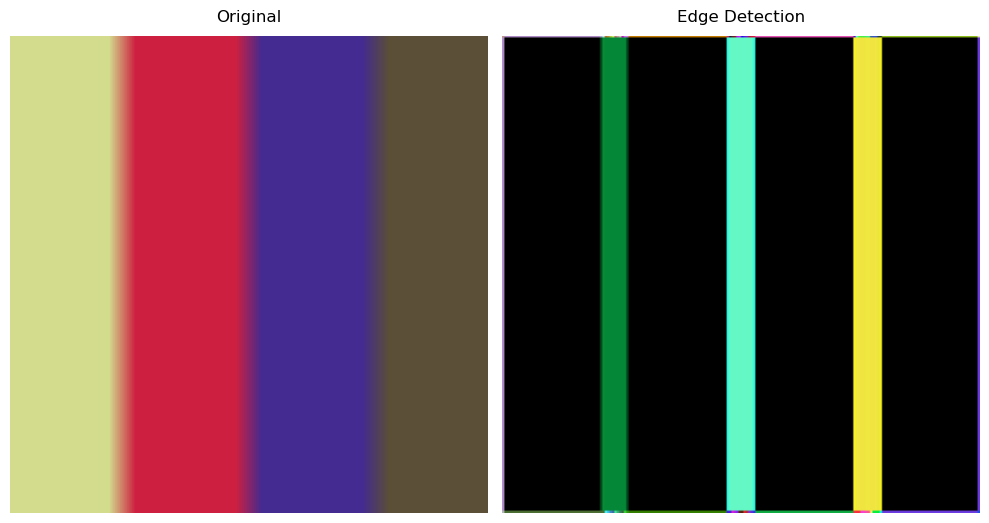

In [7]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

edge_x = np.clip(np.abs(ImageProcessing.convolve3d(image, sobel_x)), 0, 255)
edge_y = np.clip(np.abs(ImageProcessing.convolve3d(image, sobel_y)), 0, 255)
edges = np.hypot(edge_x, edge_y).astype(np.uint8)

ImageProcessing.compare_img((image, "Original"), (edges, "Edge Detection"))

In [5]:
num = 2
arr = np.stack([np.repeat(num, 10)]*10)
arr

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [35]:
rows, columns = 6, 6
val_1, val_2 = 10, 20
arr_1_row = np.repeat(val_1, rows//2)
arr_2_row = np.repeat(val_2, rows-rows//2)
arr_row = np.hstack((arr_1, arr_2))
arr = np.stack([arr_row]*5)

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

edge_x = ImageProcessing.convolve2d(arr, sobel_x)
edge_y = ImageProcessing.convolve2d(arr, sobel_y)
edges = np.hypot(edge_x, edge_y).astype(np.uint8)

print(arr)
print(edge_x)
print(edge_y)
print(edges)


[[10 10 10 20 20 20]
 [10 10 10 20 20 20]
 [10 10 10 20 20 20]
 [10 10 10 20 20 20]
 [10 10 10 20 20 20]]
[[ 0  0  0  0  0 60]
 [ 0  0  0  0  0 80]
 [ 0  0  0  0  0 80]
 [ 0  0  0  0  0 80]
 [ 0  0  0  0  0 60]]
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [30 40 50 70 80 60]]
[[ 0  0  0  0  0 60]
 [ 0  0  0  0  0 80]
 [ 0  0  0  0  0 80]
 [ 0  0  0  0  0 80]
 [30 40 50 70 80 84]]


In [84]:
result_1 = convolve2d(arr, sharpen)
result_2 = np.clip(convolve(arr, sharpen), 0, 255)

print(result_1)
print()
print(result_2)

[[ 0 12 24 36 48 96]
 [ 0  6 12 18 24 66]
 [ 0  6 12 18 24 66]
 [ 0  6 12 18 24 66]
 [ 0  6 12 18 24 66]
 [ 0 12 24 36 48 96]]

[[ 0  6 12 18 24 36]
 [ 0  6 12 18 24 36]
 [ 0  6 12 18 24 36]
 [ 0  6 12 18 24 36]
 [ 0  6 12 18 24 36]
 [ 0  6 12 18 24 36]]


In [33]:
def convolve2d(image_array: ndarray, kernel: ndarray) -> ndarray:
        """
        Applies a 2D convolution to an image array using a specified kernel.

        Parameters:
            image_array (ndarray): The image data to be convolved, expected as a 2D NumPy array.
            kernel (ndarray): The convolution kernel to apply. Must be a 2D array.
        
        Returns:
            ndarray: The convolved array
        
        Raises:
            ValueError: If the image_array does not have the correct dimension, i.e., 2
            ValueError: If the kernel is not a 2D array.
            TypeError: If the image_array is not a Numpy array.
            TypeError: If the kernel is not a Numpy array.
        """
        if not isinstance(kernel, ndarray):
            raise TypeError("kernel must be a NumPy ndarray")
        if not isinstance(image_array, ndarray):    
            raise TypeError("image_array must be a NumPy ndarray")
        if image_array.ndim != 2:
            raise ValueError("image_array must be a 2D array representing a grayscale image. Use convolve3d instead")
        if kernel.ndim != 2:
            raise ValueError("kernel must be a 2D array representing the convolution kernel")
        
        # Flip the kernel for convolution
        # This is necessary because convolution is defined as a cross-correlation operation
        kernel = np.flipud(np.fliplr(kernel))

        # Get the dimensions of the image and kernel
        rows, columns = image_array.shape
        krows, kcols = kernel.shape

        padrows, padcols = krows//2, kcols//2
        output = np.zeros_like(image_array)
        padded_img = np.pad(image_array, ((padrows, padrows), (padcols, padcols)), 'constant', constant_values=0)
        print(f"Padded \n{padded_img}")
        print(f"Kernel \n{kernel}")
        for row in range(rows):
            for col in range(columns):
                region = padded_img[row:row+krows, col:col+kcols]
                mul = region*kernel
                print(f"Region \n{region}")
                print(f"Mul \n{mul}")
                output[row, col] = np.clip(np.sum(mul), 0, 255)
        return output

In [34]:
arr = np.array([[10, 10], [10, 10]])
print(convolve2d(arr, sobel_x))

Padded 
[[ 0  0  0  0]
 [ 0 10 10  0]
 [ 0 10 10  0]
 [ 0  0  0  0]]
Kernel 
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Region 
[[ 0  0  0]
 [ 0 10 10]
 [ 0 10 10]]
Mul 
[[  0   0   0]
 [  0   0 -20]
 [  0   0 -10]]
Region 
[[ 0  0  0]
 [10 10  0]
 [10 10  0]]
Mul 
[[ 0  0  0]
 [20  0  0]
 [10  0  0]]
Region 
[[ 0 10 10]
 [ 0 10 10]
 [ 0  0  0]]
Mul 
[[  0   0 -10]
 [  0   0 -20]
 [  0   0   0]]
Region 
[[10 10  0]
 [10 10  0]
 [ 0  0  0]]
Mul 
[[10  0  0]
 [20  0  0]
 [ 0  0  0]]
[[ 0 30]
 [ 0 30]]


In [ ]:
arr = np.array([[0, 0, 0], [0, 10, 10], [0, 10, 10]])
inv = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
mul = np.sum(arr*inv)

np.int64(-30)